In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import product
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%matplotlib notebook

In [3]:
df = pd.read_excel('Sept3.xls')

In [4]:
df.head()

,ENTRY,Y1,Y2,Y3,Y4,Y5,Y6
0,1,1.208480,60.585480,0.321087,-2.672389,23.434620,23.122887
1,2,1.535352,61.186986,0.210303,-1.454594,21.836258,23.394951
2,3,3.922266,62.869360,2.118723,1.452685,22.219179,24.554996
3,4,4.679354,65.257795,4.720506,1.747455,24.151701,25.619096
4,5,4.052339,67.695106,6.320294,0.727988,26.077049,26.419092


In [6]:
exog = df['Y1']

<IPython.core.display.Javascript object>


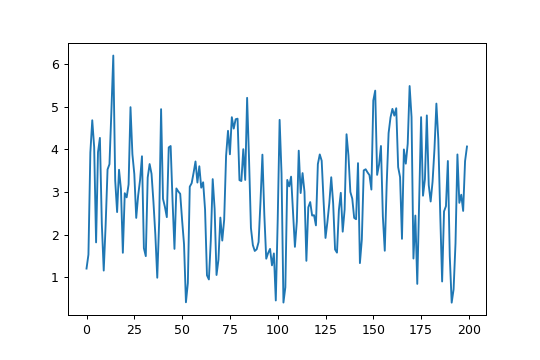

<AxesSubplot:>

In [11]:
exog.plot()

In [19]:
def optimize_ARIMA(order_list, exog):
    """
        Return dataframe with parameters and corresponding AIC
        
        order_list - list with (p, d, q) tuples
        exog - the exogenous variable
    """
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = ARIMA(exog, order=order).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([order, model.aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, d, q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [20]:
ps = range(0, 8, 1)
d = 0
qs = range(0, 8, 1)
# Create a list with all possible combination of parameters
parameters = product(ps, qs)
parameters_list = list(parameters)
order_list = []
for each in parameters_list:
    each = list(each)
    each.insert(1,0)
    each = tuple(each)
    order_list.append(each)
# print(order_list)   
result_df = optimize_ARIMA(order_list, exog=exog)
result_df

  0%|          | 0/64 [00:00<?, ?it/s]

ValueError: Length mismatch: Expected axis has 0 elements, new values have 2 elements

In [17]:
model = ARIMA(endog, order=(1, 0, 3))
# res = model.fit()
res = model.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                     Y1   No. Observations:                  200
Model:                 ARIMA(1, 0, 3)   Log Likelihood                -275.296
Date:                Thu, 24 Mar 2022   AIC                            562.592
Time:                        16:40:19   BIC                            582.382
Sample:                             0   HQIC                           570.600
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9537      0.122     24.147      0.000       2.714       3.193
ar.L1          0.6607    261.873      0.003      0.998    -512.600     513.922
ma.L1          0.0157    261.867   6.01e-05      1.0

In [22]:
model = ARIMA(endog, order=(0, 0, 1))
# res = model.fit()
res = model.fit()
print(res.aic)
model = ARIMA(endog, order=(0, 0, 2))
# res = model.fit()
res = model.fit()
print(res.aic)

559.3811337047127
558.5917737547134


In [4]:
ind_prod = pd.read_csv('industrial production uk.csv')

<IPython.core.display.Javascript object>


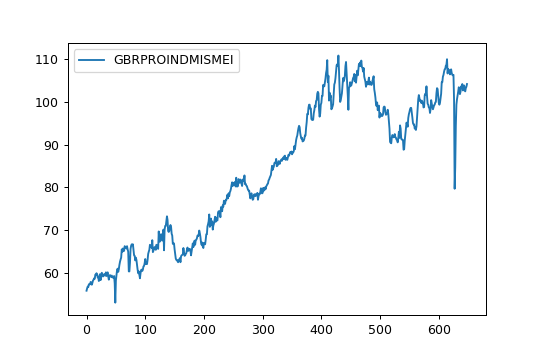

<AxesSubplot:>

In [5]:
ind_prod.plot()

In [6]:
from statsmodels.tsa.ardl import ARDL

In [7]:
df.head()

,ENTRY,Y1,Y2,Y3,Y4,Y5,Y6
0,1,1.208480,60.585480,0.321087,-2.672389,23.434620,23.122887
1,2,1.535352,61.186986,0.210303,-1.454594,21.836258,23.394951
2,3,3.922266,62.869360,2.118723,1.452685,22.219179,24.554996
3,4,4.679354,65.257795,4.720506,1.747455,24.151701,25.619096
4,5,4.052339,67.695106,6.320294,0.727988,26.077049,26.419092
